<a href="https://colab.research.google.com/github/luturonunca/GFEFLpy/blob/main/Formacion_de_Galaxias_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets start by making the galaxy files available on your google Drive, this should not take space of your available google drive space.

1.   Click the share folder link sent before
2.   Open Google Drive
3.   Go to "Shared with me".
4.   Right-click the shared folder → Click "Add shortcut to Drive" (enlace directo).
5.   Place it inside "My Drive"

Now we can proceed to access the simulations datasets from this notebook.



In [ ]:
# Mounting Drive in local environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file manager with bash nomenclature
import glob
# make one array for all simulations
galpaths = glob.glob("/content/drive/MyDrive/GALFILES/*")
galpaths


['/content/drive/MyDrive/GALFILES/Mochima2_SF1DC.g2',
 '/content/drive/MyDrive/GALFILES/Mochima1_SF0DC.g2',
 '/content/drive/MyDrive/GALFILES/NewHorizon_Disc3.g2',
 '/content/drive/MyDrive/GALFILES/NewHorizon_Disc4.g2',
 '/content/drive/MyDrive/GALFILES/NewHorizon_Disc2.g2',
 '/content/drive/MyDrive/GALFILES/NewHorizon_Disc0.g2',
 '/content/drive/MyDrive/GALFILES/Mochima1_SF1DCe1.g2',
 '/content/drive/MyDrive/GALFILES/Mochima1_SF1MEe1.g2']

In [ ]:
for i in range(len(galpaths)):
  print(galpaths[i].split("/")[-1].split(".")[-2],"---->",i)

Mochima2_SF1DC ----> 0
Mochima1_SF0DC ----> 1
NewHorizon_Disc3 ----> 2
NewHorizon_Disc4 ----> 3
NewHorizon_Disc2 ----> 4
NewHorizon_Disc0 ----> 5
Mochima1_SF1DCe1 ----> 6
Mochima1_SF1MEe1 ----> 7


The available simulations correspond to disc (hopefully spiral) galaxies simualted with RAMSES (Teyssier 2002). These files are a reduction so they are not too heavy and they are in the format of Gadget 2 simulations, hence the ".g2" ending.

In [ ]:
# Install the python library to load the data from a g2 file.
!pip install unsio
# something related to graphic environment
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

In [ ]:
# basic imports
# numpy
import numpy as np
# unsio (the one we just installed)
import unsio.input as uns_in
# matplotlib
import matplotlib.pylab as plt
# purely stetic
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [ ]:
# indice to choose which simulation to load from the galpath arrays
mychoice= 2
if mychoice > len(galpaths)-1:
  print("should not be bigger than {0:.0f}".format(len(galpaths)-1))

In [ ]:
# define the simulation to be loaded
simname=galpaths[mychoice]
# today we start with stars
comp="stars"
times="all"
float32=True
uns = uns_in.CUNS_IN(simname,comp,times,float32)
bits=""         # select properties, "" means all
ok=uns.nextFrame(bits)   # load data from disk

In [ ]:
prop="pos"
# read positions
ok,pos = uns.getData(comp,prop)
print("pos  :",bool(ok))

prop="age"
# read ages
ok,age = uns.getData(comp,prop)
print("age  :",bool(ok))

prop="mass"
# read masses
ok,mass = uns.getData(comp,prop)
print("mass :",bool(ok))



pos  : True
age  : True
mass : True


In [ ]:
# reshape the position data
pos3d = pos.reshape(int(len(pos)/3),3)


In [ ]:

print("Age at the beggining of the universe is {0:.3f} Gyr and today is {1:.1f} Gyr".format(age.min(),age.max()))


Age at the beggining of the universe is -13.600 Gyr and today is -0.0 Gyr


Text(0.5, 0, '$\\rm kpc $')

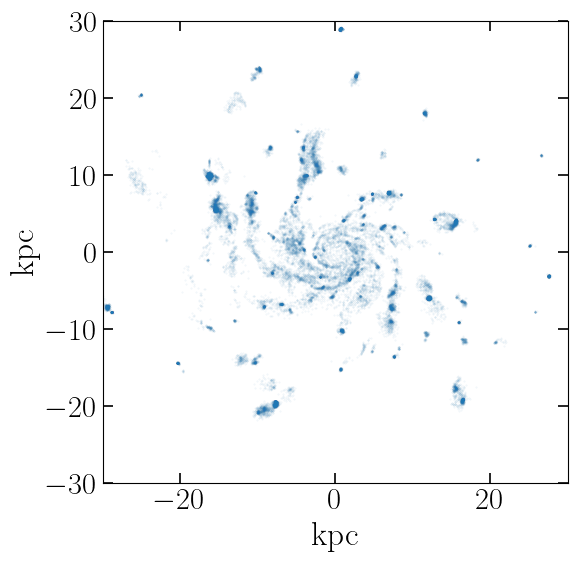

In [ ]:
fig, ax = plt.subplots(figsize=[6,6])
sel = np.where(age>-0.1)
#sel = np.where((age<-0.1)&(age>-1))[0]
#sel = np.where((age<-1)&(age>-2))[0]
#sel = np.where((age<-2)&(age>-3))[0]
#sel = np.where((age<-5)&(age>-6))[0]
#sel = np.where(age<-6)[0]
distance = 200-pos3d[:,2][sel]
ax.scatter(pos3d[:,0][sel],pos3d[:,1][sel],alpha=0.1,s=0.1)
#ax.scatter(pos3d[:,0],pos3d[:,1])
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])

ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm kpc $",fontsize=24)
ax.set_xlabel(r"$\rm kpc $",fontsize=24)

In [ ]:
def matrix_vs_vector(mat, vec):
    """
    Optimized matrix-vector multiplication for an array of 3D vectors.

    Parameters:
        mat (numpy.ndarray): 3x3 rotation matrix.
        vec (numpy.ndarray): Array of shape (N, 3) representing 3D vectors.

    Returns:
        numpy.ndarray: Rotated 3D vectors.
    """
    res = np.zeros_like(vec)
    res[:, 0] = mat[0, 0] * vec[:, 0] + mat[0, 1] * vec[:, 1] + mat[0, 2] * vec[:, 2]
    res[:, 1] = mat[1, 0] * vec[:, 0] + mat[1, 1] * vec[:, 1] + mat[1, 2] * vec[:, 2]
    res[:, 2] = mat[2, 0] * vec[:, 0] + mat[2, 1] * vec[:, 1] + mat[2, 2] * vec[:, 2]
    return res

In [ ]:
def rotate_galaxy(pos3d, rmin=3, rmax=10):
    """
    Rotates a set of 3D points so that the plane of the galaxy aligns with the x-y plane.

    Parameters:
        pos3d (numpy.ndarray): Array of shape (N, 3) representing the 3D positions of points.
        rmin (float): Minimum radius for selecting points to determine rotation.
        rmax (float): Maximum radius for selecting points to determine rotation.

    Returns:
        numpy.ndarray: The rotated 3D positions of the input points.
    """
    # Compute the squared radii for all points
    r2 = np.sum(pos3d**2, axis=1)

    # Select points within the specified radius range
    pos_ring = pos3d[(r2 < rmax**2) & (r2 > rmin**2)]

    if len(pos_ring) == 0:
        raise ValueError("No points found within the specified radius range.")

    # Compute the moment of inertia tensor (P matrix)
    P = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            P[i, j] = np.mean(pos_ring[:, i] * pos_ring[:, j]) - np.mean(pos_ring[:, i]) * np.mean(pos_ring[:, j])

    # Compute eigenvectors and eigenvalues
    eigen_values, eigen_vectors = np.linalg.eig(P)

    # Sort eigenvectors based on absolute eigenvalues
    order = np.argsort(abs(eigen_values))
    T = np.zeros((3, 3))
    T[0], T[1], T[2] = eigen_vectors[:, order[2]], eigen_vectors[:, order[1]], eigen_vectors[:, order[0]]

    # Apply rotation using matrix-vector multiplication
    rotated_pos3d = matrix_vs_vector(T, pos3d)

    return rotated_pos3d

%%latex

Step 1: Select Stars in a Radial Range

Define the 3D radius of each star:
\begin{equation}
r^2 = x^2 + y^2 + z^2
\end{equation}
Choose only stars within a given range:
\begin{equation}
r_{\min} < r < r_{\max}
\end{equation}

Step 2: Compute the Moment of Inertia Tensor

Construct the symmetric tensor:
\begin{equation}
P_{ij} = \langle x_i x_j \rangle - \langle x_i \rangle \langle x_j \rangle
\end{equation}
where $x_i$ and $x_j$ are stellar coordinates, and brackets denote averaging.

Step 3: Find Eigenvectors of $P$

Solve the eigenvalue equation:
\begin{equation}
P \mathbf{v} = \lambda \mathbf{v}
\end{equation}
Sort eigenvalues in increasing order. The eigenvector corresponding to the smallest eigenvalue is the galaxy’s rotation axis.

Step 4: Construct Rotation Matrix

Define the transformation matrix $T$ using the eigenvectors:
\begin{equation}
T = \begin{bmatrix} \mathbf{v}_1 & \mathbf{v}_2 & \mathbf{v}_3 \end{bmatrix}^T
\end{equation}
where $\mathbf{v}_1$, $\mathbf{v}_2$, and $\mathbf{v}_3$ are sorted eigenvectors.

Step 5: Rotate the Coordinates

Transform positions using:
\begin{equation}
\mathbf{x'} = T \mathbf{x}
\end{equation}
This aligns the galaxy’s disk with the $xy$-plane.

In [ ]:
# WARNING this is replacing the original pos3d file
# do not run more than one time
pos3d = rotate_galaxy(pos3d, rmin=3, rmax=10)

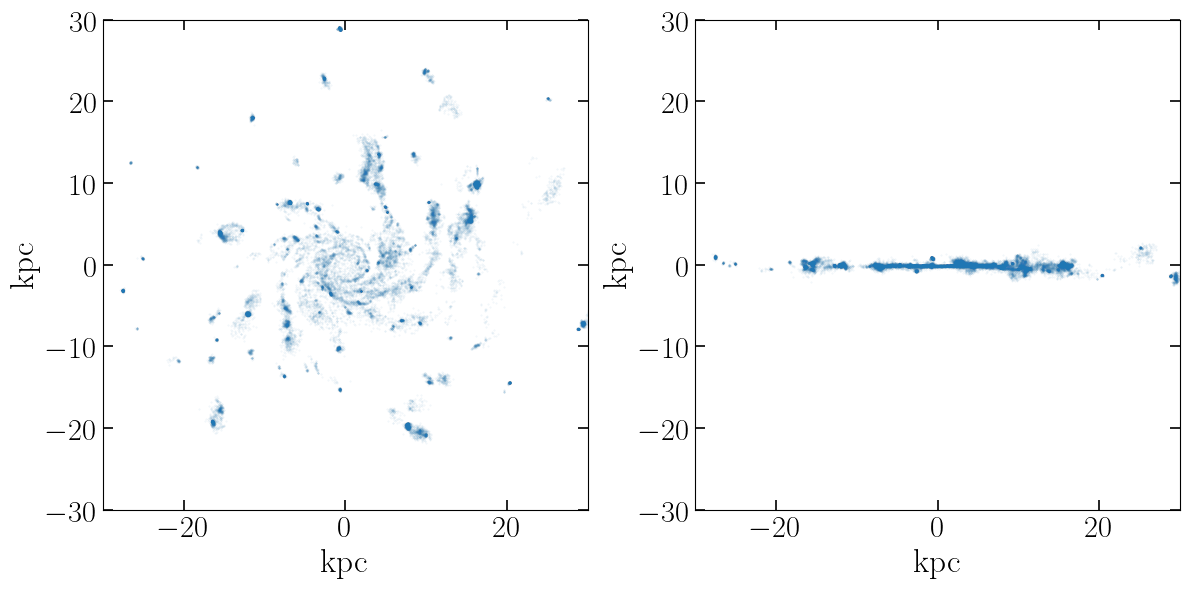

In [ ]:
fig, ax = plt.subplots(1,2,figsize=[12,6])
sel = np.where(age>-0.1)

ax[0].scatter(pos3d[:,0][sel],pos3d[:,1][sel],alpha=0.1,s=0.1)

ax[0].set_xlim([-30,30])
ax[0].set_ylim([-30,30])

ax[1].scatter(pos3d[:,0][sel],pos3d[:,2][sel],alpha=0.1,s=0.1)

ax[1].set_xlim([-30,30])
ax[1].set_ylim([-30,30])

ax[1].tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax[1].set_ylabel(r"$\rm kpc $",fontsize=24)
ax[1].set_xlabel(r"$\rm kpc $",fontsize=24)

ax[0].tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax[0].set_ylabel(r"$\rm kpc $",fontsize=24)
ax[0].set_xlabel(r"$\rm kpc $",fontsize=24)
plt.tight_layout()

**Star formation hystory (SFH)**
we will use a weighted histogram of the ages of the stars

Text(0.5, 0, '$\\rm lookback\\; time \\; [Gyr]$')

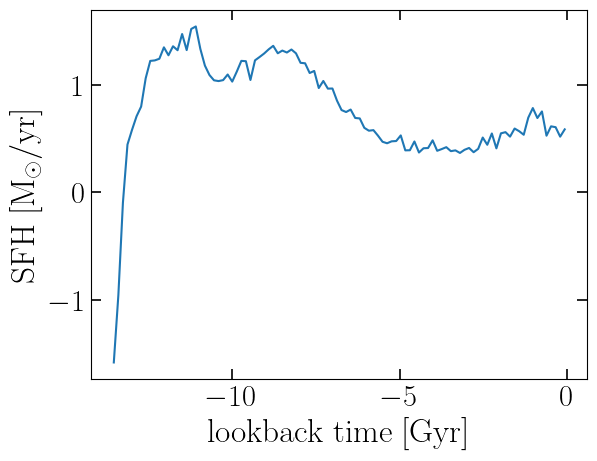

In [ ]:
bins = 100

hist, bins = np.histogram(age,bins=bins,weights=mass)
b_c = (bins[1:]+bins[:-1])/2
deltaA = 1e9*(bins[1:]-bins[:-1])
SFH = hist/deltaA

fig, ax = plt.subplots()

ax.plot(b_c,np.log10(SFH))
ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm SFH\;[M_{\odot}/yr] $",fontsize=24)
ax.set_xlabel(r"$\rm lookback\; time \; [Gyr]$",fontsize=24)

# Saving a datafile for posterior comparison

In [ ]:
GALNAME = "TestGalaxy"
header  = "Star formation history for galax"+GALNAME+ "\n"
header += "disc galaxy from tha simulation"
header += "format : \n"
header += "lookbacktime ,    SFH \n"
header += "    [Gyr]    , [Msun/yr]"
file_path = "/content/drive/My Drive/GALFILES/textfiles/"
#name format GALNAME_Lastname.txt
np.savetxt(file_path+'test_SFH.txt', np.c_[b_c,SFH],delimiter=',', header=header, fmt='%.3f')

# Read datafiles and compare

In [ ]:
SFH_files = glob.glob(file_path+"/*")


Text(0.5, 0, '$\\rm lookback\\; time \\; [Gyr]$')

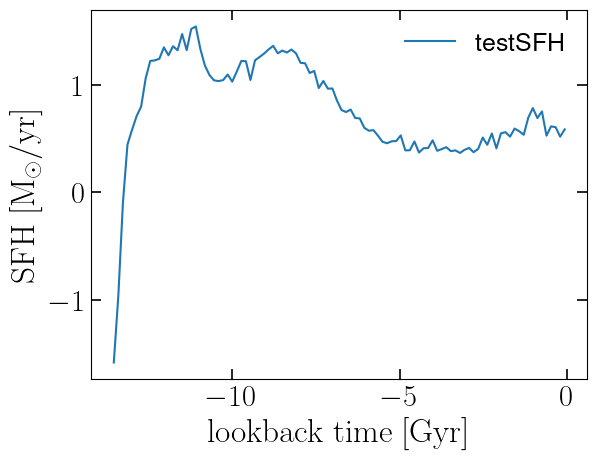

In [ ]:
fig, ax = plt.subplots()


for i,f in enumerate(SFH_files):
  dat = np.loadtxt(f,delimiter=",")
  linelab = f.split("/")[-1].split(".")[-2]
  ax.plot(dat[:,0],np.log10(dat[:,1]),label=linelab)




legend = ax.legend(loc='best', ncol=1, shadow=False, fontsize=18,frameon=False)

ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm SFH\;[M_{\odot}/yr] $",fontsize=24)
ax.set_xlabel(r"$\rm lookback\; time \; [Gyr]$",fontsize=24)

# Comparison with published models

Now a little industry trick, google for "webplotdigitizer ankit rohatgi" and lets make a theory comparison


Text(0.5, 0, '$\\rm lookback\\; time \\; [Gyr]$')

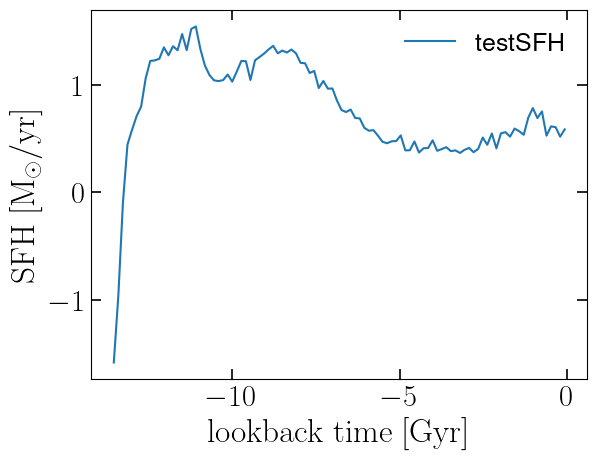

In [ ]:
fig, ax = plt.subplots()


for i,f in enumerate(SFH_files):
  dat = np.loadtxt(f,delimiter=",")
  linelab = f.split("/")[-1].split(".")[-2]
  ax.plot(dat[:,0],np.log10(dat[:,1]),label=linelab)




legend = ax.legend(loc='best', ncol=1, shadow=False, fontsize=18,frameon=False)

ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm SFH\;[M_{\odot}/yr] $",fontsize=24)
ax.set_xlabel(r"$\rm lookback\; time \; [Gyr]$",fontsize=24)

2D histogram for galaxy maps

In [ ]:
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
import matplotlib as mpl

Text(0.5, 0, '$\\rm kpc $')

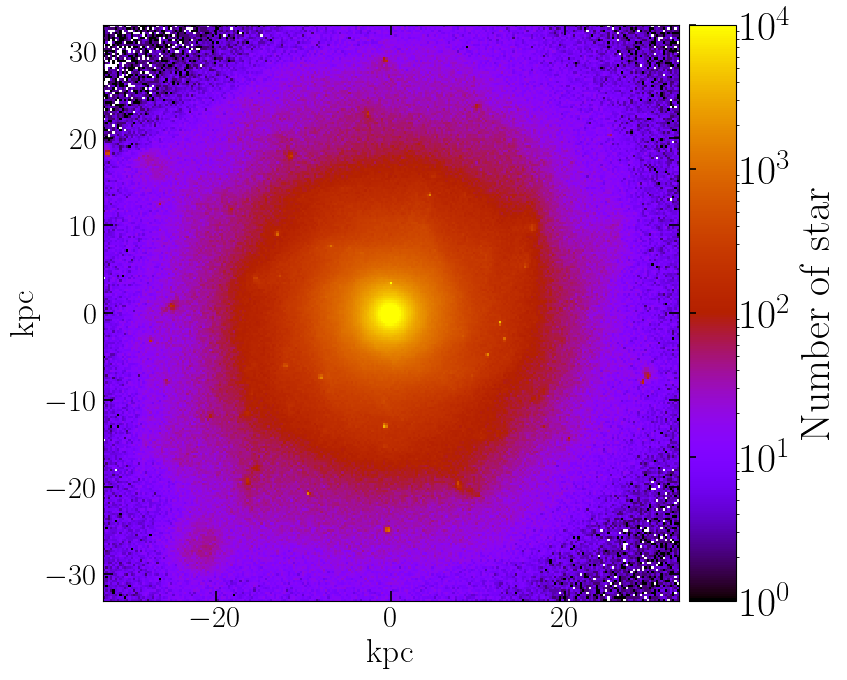

In [ ]:
fig = plt.figure(figsize=[7,6])
###########.    y.   x.
gs1 = GridSpec(60, 70,left=0.02,right=0.98,bottom=0.02,top=0.98,wspace=0.09,hspace=0.09)


cmap = "gnuplot"
ax = fig.add_subplot(gs1[:,:60])
x,y,z = 0,1,2
thelim = 30
limmin,limmax = 1,1e4
edges = np.linspace(-1.1*thelim,1.1*thelim,250)
Nstar, xedges, yedges = np.histogram2d(pos3d[:,x],
                                   pos3d[:,y],
                                   bins=(edges, edges))

fullbox = Nstar.T

mass_2 = ax.imshow(fullbox,interpolation='nearest', origin='lower',cmap=cmap,
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                      norm=LogNorm(vmin=limmin,vmax=limmax)
                  )

bar = fig.add_subplot(gs1[:,61:66])
norm = mpl.colors.LogNorm(vmin=limmin, vmax=limmax)
cb = mpl.colorbar.ColorbarBase(bar, cmap=cmap,
                                norm=norm,
                                orientation='vertical')


cb.ax.yaxis.set_ticks_position('right')
cb.ax.yaxis.set_label_position('right')

bar.tick_params(axis='both', which='major', labelsize=30,direction="in",
                size=5,width=1.2,right=False,top=True,left=True)
bar.set_ylabel(r"$\rm Number \; of\; star$",fontsize=30,labelpad=5)
ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm kpc $",fontsize=24)
ax.set_xlabel(r"$\rm kpc $",fontsize=24)


# Weighted 2d histogram


Text(0.5, 0, '$\\rm kpc $')

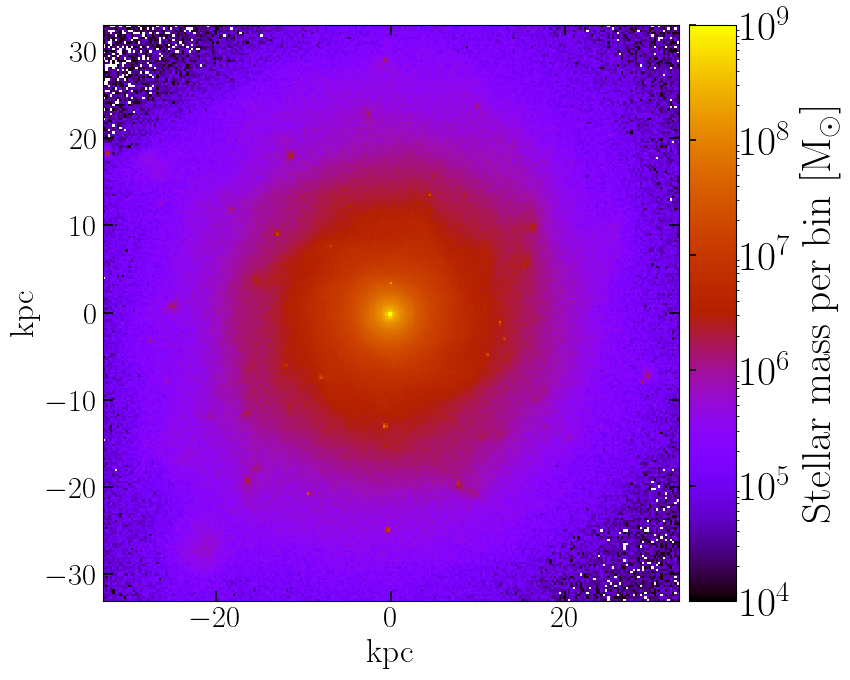

In [ ]:
fig = plt.figure(figsize=[7,6])
###########.    y.   x.
gs1 = GridSpec(60, 70,left=0.02,right=0.98,bottom=0.02,top=0.98,wspace=0.09,hspace=0.09)


cmap = "gnuplot"
ax = fig.add_subplot(gs1[:,:60])
x,y,z = 0,1,2
thelim = 30
limmin,limmax = 1e4,1e9
edges = np.linspace(-1.1*thelim,1.1*thelim,250)
Mstar, xedges, yedges = np.histogram2d(pos3d[:,x],
                                   pos3d[:,y],
                                   bins=(edges, edges),
                                  weights=mass)



fullbox = Mstar.T

mass_2 = ax.imshow(fullbox,interpolation='nearest', origin='lower',cmap=cmap,
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                      norm=LogNorm(vmin=limmin,vmax=limmax)
                  )

bar = fig.add_subplot(gs1[:,61:66])
norm = mpl.colors.LogNorm(vmin=limmin, vmax=limmax)
cb = mpl.colorbar.ColorbarBase(bar, cmap=cmap,
                                norm=norm,
                                orientation='vertical')


cb.ax.yaxis.set_ticks_position('right')
cb.ax.yaxis.set_label_position('right')

bar.tick_params(axis='both', which='major', labelsize=30,direction="in",
                size=5,width=1.2,right=False,top=True,left=True)
bar.set_ylabel(r"$\rm Stellar \; mass\; per\; bin \; [M_{\odot}]$",fontsize=30,labelpad=5)
ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm kpc $",fontsize=24)
ax.set_xlabel(r"$\rm kpc $",fontsize=24)

<ipython-input-178-d8cc2a3a8e56>:22: RuntimeWarning: invalid value encountered in divide
  fullbox = (Mstar/Nstar).T


Text(0.5, 0, '$\\rm kpc $')

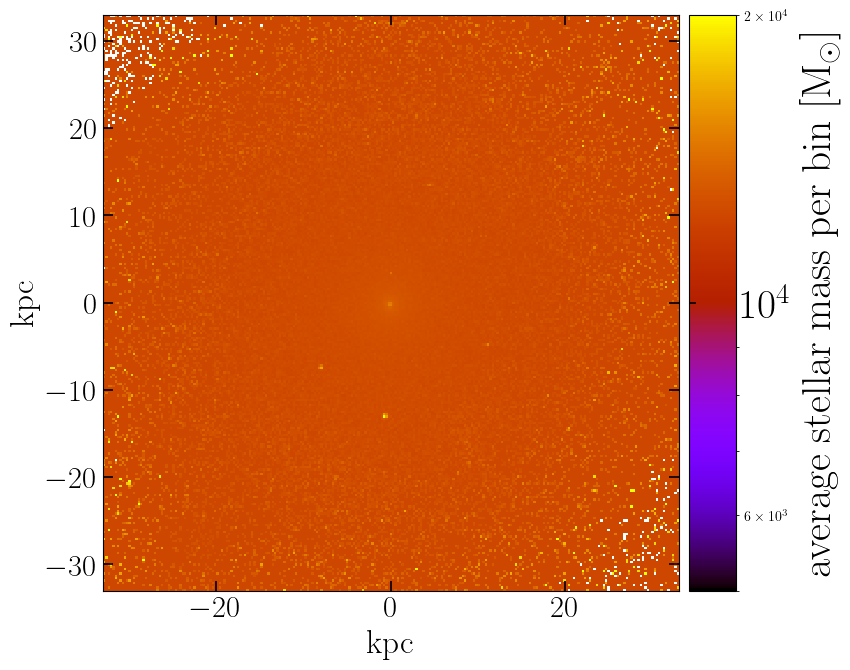

In [ ]:
fig = plt.figure(figsize=[7,6])
###########.    y.   x.
gs1 = GridSpec(60, 70,left=0.02,right=0.98,bottom=0.02,top=0.98,wspace=0.09,hspace=0.09)


cmap = "gnuplot"
ax = fig.add_subplot(gs1[:,:60])
x,y,z = 0,1,2
thelim = 30
limmin,limmax = 5e3,2e4
edges = np.linspace(-1.1*thelim,1.1*thelim,250)
Mstar, xedges, yedges = np.histogram2d(pos3d[:,x],
                                   pos3d[:,y],
                                   bins=(edges, edges),
                                  weights=mass)


Nstar, xedges, yedges = np.histogram2d(pos3d[:,x],
                                   pos3d[:,y],
                                   bins=(edges, edges))

fullbox = (Mstar/Nstar).T

mass_2 = ax.imshow(fullbox,interpolation='nearest', origin='lower',cmap=cmap,
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                      norm=LogNorm(vmin=limmin,vmax=limmax)
                  )

bar = fig.add_subplot(gs1[:,61:66])
norm = mpl.colors.LogNorm(vmin=limmin, vmax=limmax)
cb = mpl.colorbar.ColorbarBase(bar, cmap=cmap,
                                norm=norm,
                                orientation='vertical')


cb.ax.yaxis.set_ticks_position('right')
cb.ax.yaxis.set_label_position('right')

bar.tick_params(axis='both', which='major', labelsize=30,direction="in",
                size=5,width=1.2,right=False,top=True,left=True)
bar.set_ylabel(r"$\rm average \; stellar \; mass\; per\; bin \; [M_{\odot}]$",fontsize=30,labelpad=5)
ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm kpc $",fontsize=24)
ax.set_xlabel(r"$\rm kpc $",fontsize=24)

# Weighting by a model, Luminosity

%%latex

Given a stellar population characterized by its total mass $M$, age $t$, and metallicity $Z$, its bolometric luminosity $L_{\text{bol}}$ can be approximated using stellar population synthesis (SPS) models.

\subsection*{Basic Luminosity Scaling}
The bolometric luminosity per unit mass of a single stellar population (SSP) evolves over time as:
\begin{equation}
\ell(t) = 10^{3.5} \times \left(\frac{t}{1\, \text{Myr}}\right)^{-0.8},
\end{equation}
where $\ell(t)$ is in units of $L_{\odot}/M_{\odot}$.

The total luminosity is then given by:
\begin{equation}
L_{\text{bol}} = M \times \ell(t).
\end{equation}
Metallicity Dependence

Metallicity affects stellar opacity, influencing the radiative efficiency of stars. A simple empirical correction for metallicity can be introduced as:
\begin{equation}
\ell(t, Z) = 10^{3.5} \times \left(\frac{t}{1\, \text{Myr}}\right)^{-0.8} \times \left(\frac{Z}{Z_{\odot}}\right)^{-0.2}.
\end{equation}

Thus, the total luminosity becomes:
\begin{equation}
L_{\text{bol}} = M \times 10^{3.5} \times \left(\frac{t}{1\, \text{Myr}}\right)^{-0.8} \times \left(\frac{Z}{Z_{\odot}}\right)^{-0.2}.
\end{equation}

This equation accounts for both stellar aging and the effect of metal content on luminosity, making it useful for estimating the brightness of star particles in simulations.


In [ ]:
def luminosity(age):
  # Simplified luminosity model
  # without metalicity
  # input: age in Gyr
  #return (1e8)*(age*1e3)**(-2)

  return (10**3.5)*(age*1e3)**(-0.8)


In [ ]:
lum = luminosity((-age)+0.01)


<ipython-input-167-a3ba423c0b69>:7: RuntimeWarning: divide by zero encountered in power
  return (10**3.5)*(age*1e3)**(-0.8)


Text(0.5, 0, '$\\rm lookback\\; time \\; [Gyr]$')

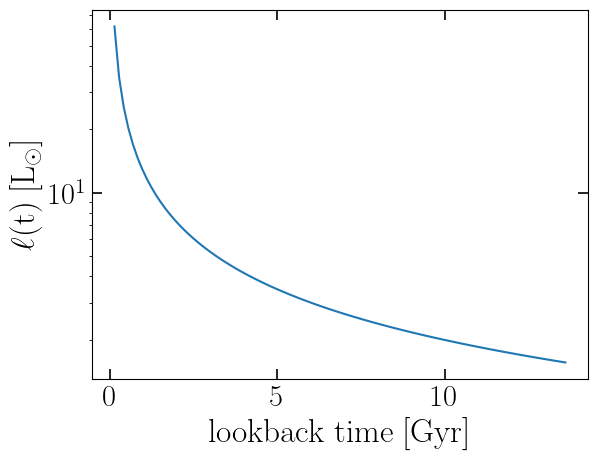

In [ ]:
fig , ax = plt.subplots()
ax.set_yscale("log")
ages = np.linspace(0,13.6,100)
luminosities =  luminosity(ages)

ax.plot(ages,luminosities)

ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm  \ell(t) \; [L_{\odot}] $",fontsize=24)
ax.set_xlabel(r"$\rm lookback\; time \; [Gyr]$",fontsize=24)

In [ ]:
lum = luminosity(-age+0.001)
lum

array([0.81966716, 0.9311086 , 0.912429  , ..., 2.5631201 , 0.6381368 ,
       0.83497876], dtype=float32)

Text(0.5, 0, '$\\rm kpc $')

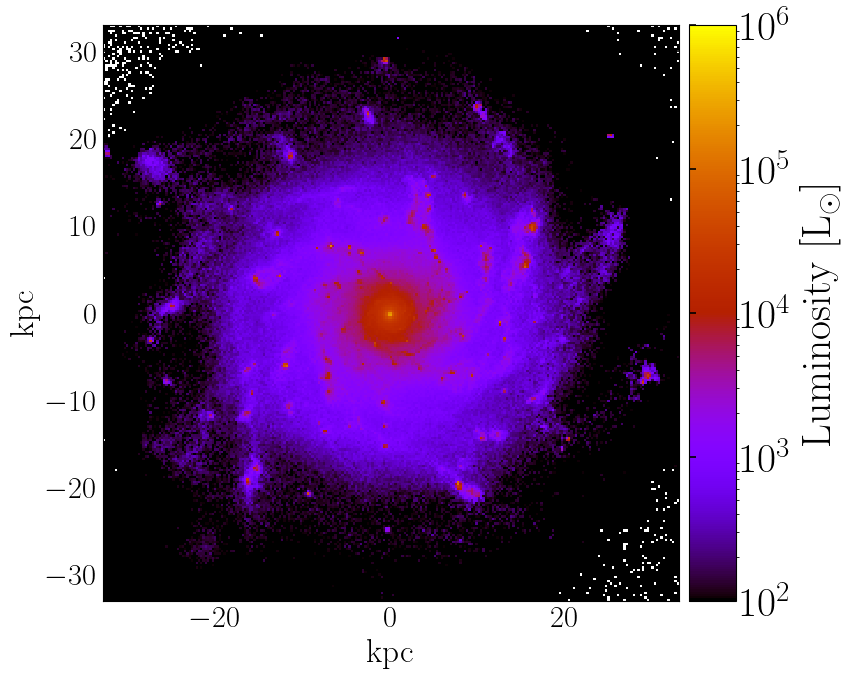

In [ ]:
fig = plt.figure(figsize=[7,6])
###########.    y.   x.
gs1 = GridSpec(60, 70,left=0.02,right=0.98,bottom=0.02,top=0.98,wspace=0.09,hspace=0.09)


cmap = "gnuplot"
ax = fig.add_subplot(gs1[:,:60])
x,y,z = 0,1,2
thelim = 30
limmin,limmax = 1e2,1e6
edges = np.linspace(-1.1*thelim,1.1*thelim,250)
Lstar, xedges, yedges = np.histogram2d(pos3d[:,x],
                                   pos3d[:,y],
                                   bins=(edges, edges),
                                  weights=lum)

Nstar, xedges, yedges = np.histogram2d(pos3d[:,x],
                                   pos3d[:,y],
                                   bins=(edges, edges))

fullbox = (Lstar).T

mass_2 = ax.imshow(fullbox,interpolation='nearest', origin='lower',cmap=cmap,
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                      norm=LogNorm(vmin=limmin,vmax=limmax)
                  )

bar = fig.add_subplot(gs1[:,61:66])
norm = mpl.colors.LogNorm(vmin=limmin, vmax=limmax)
cb = mpl.colorbar.ColorbarBase(bar, cmap=cmap,
                                norm=norm,
                                orientation='vertical')


cb.ax.yaxis.set_ticks_position('right')
cb.ax.yaxis.set_label_position('right')

bar.tick_params(axis='both', which='major', labelsize=30,direction="in",
                size=5,width=1.2,right=False,top=True,left=True)
bar.set_ylabel(r"$\rm Luminosity \; [L_{\odot}]$",fontsize=30,labelpad=5)
ax.tick_params(axis='both', which='major', labelsize=22,direction="in",right=True,
                   size=7,width=1.2,top=True)

ax.set_ylabel(r"$\rm kpc $",fontsize=24)
ax.set_xlabel(r"$\rm kpc $",fontsize=24)